
![ Data Analysis](loan_prediction.png)


# Objective  - Loan Prediction

# Exploratory Data Analysis (EDA)


# 1. Load python modules

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# 2. Read the dataset

In [136]:
loan_df = pd.read_csv(r"train_data.csv")
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [137]:
print(loan_df["Loan_ID"].nunique())
loan_df.drop("Loan_ID",axis=1,inplace=True)
loan_df

614


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# 3. Basic Inspection about the dataset

In [138]:
def basic_insepction_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum()) 
basic_insepction_dataset(loan_df)  

top 5 rows - using head
  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2       

### Observations - dataset

- Have 615 Sample with Varaibles 12
- There are null values in the dataset


#### Categorical Variables:
- 'Gender'
- 'Married'
- 'Dependents' 
- 'Education'
- 'Self_Employed'
- 'Property_Area'
- 'Loan_Status'
- 'Credit_History'


#### Numerical Variables:
- 'ApplicantIncome'
- 'CoapplicantIncome' 
- 'LoanAmount'
- 'Loan_Amount_Term'
      

# 4. Handling Missing Values - Cat

In [139]:
def print_cat_values(cat_var):
    print("We are studying about :", cat_var)
    print("categories:",loan_df[cat_var].unique())
    print("num of categories:",loan_df[cat_var].nunique())
    print("Value-counts:", loan_df[cat_var].value_counts())   


In [140]:
for i in ["Gender", "Married","Dependents","Self_Employed"]:
    print_cat_values(i)
    print("=========================================")
    print()


We are studying about : Gender
categories: ['Male' 'Female' nan]
num of categories: 2
Value-counts: Gender
Male      489
Female    112
Name: count, dtype: int64

We are studying about : Married
categories: ['No' 'Yes' nan]
num of categories: 2
Value-counts: Married
Yes    398
No     213
Name: count, dtype: int64

We are studying about : Dependents
categories: ['0' '1' '2' '3+' nan]
num of categories: 4
Value-counts: Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

We are studying about : Self_Employed
categories: ['No' 'Yes' nan]
num of categories: 2
Value-counts: Self_Employed
No     500
Yes     82
Name: count, dtype: int64



In [141]:
for var in ["Gender", "Married","Dependents","Self_Employed"]:
    mode = loan_df[var].mode()[0]
    #print(mode)

    # fill the missing value with mode
    loan_df[var].fillna(mode,inplace=True)
    
# check for missing values - for confirmation
loan_df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# 5. Categorical- Variable - Analysis -Using Pipeline

In [142]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [143]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

Gender frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 |  Male  |    502    |
| 1 | Female |    112    |
+---+--------+-----------+
Gender Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 |  Male  |    502    |        81.76         |
| 1 | Female |    112    |        18.24         |
+---+--------+-----------+----------------------+


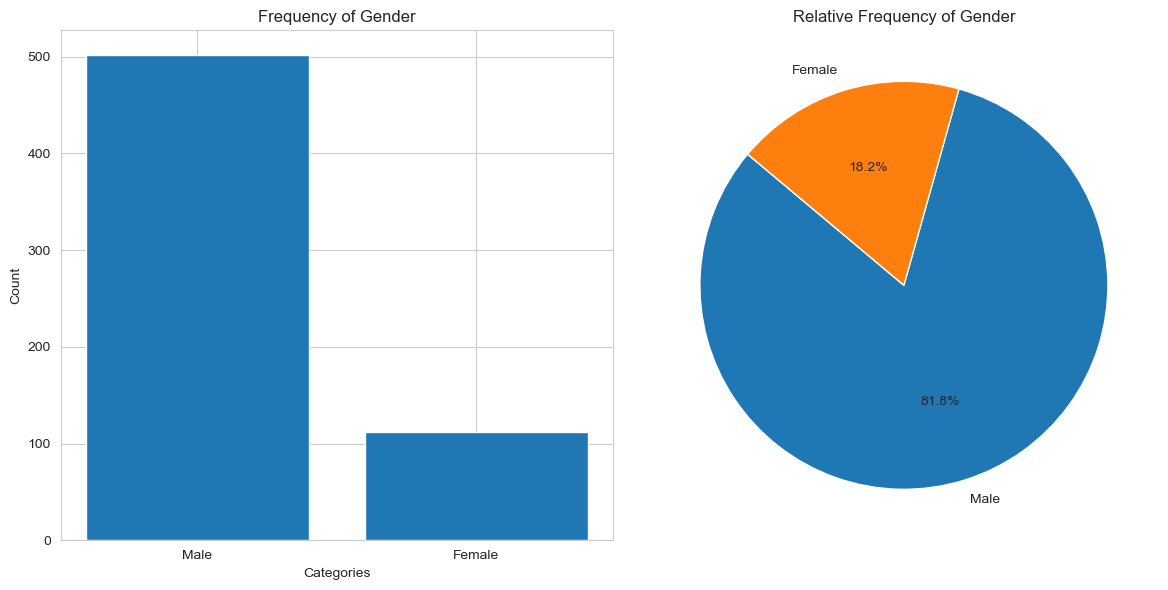

Married frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  Yes  |    401    |
| 1 |  No   |    213    |
+---+-------+-----------+
Married Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  Yes  |    401    |        65.31         |
| 1 |  No   |    213    |        34.69         |
+---+-------+-----------+----------------------+


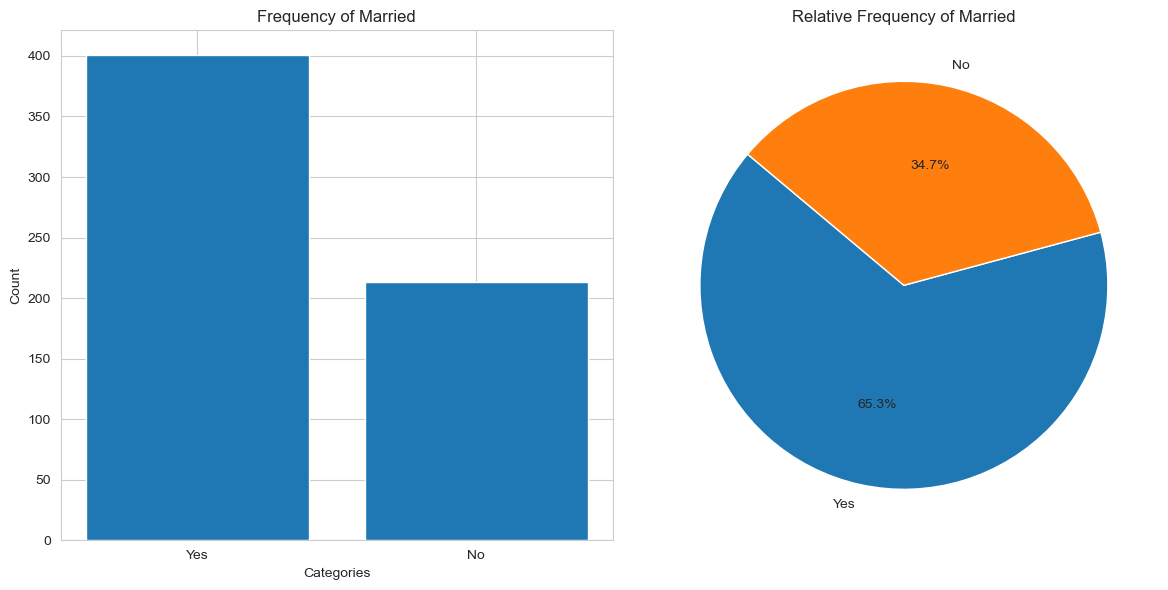

Dependents frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   0   |    360    |
| 1 |   1   |    102    |
| 2 |   2   |    101    |
| 3 |  3+   |    51     |
+---+-------+-----------+
Dependents Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   0   |    360    |        58.63         |
| 1 |   1   |    102    |        16.61         |
| 2 |   2   |    101    |        16.45         |
| 3 |  3+   |    51     |         8.31         |
+---+-------+-----------+----------------------+


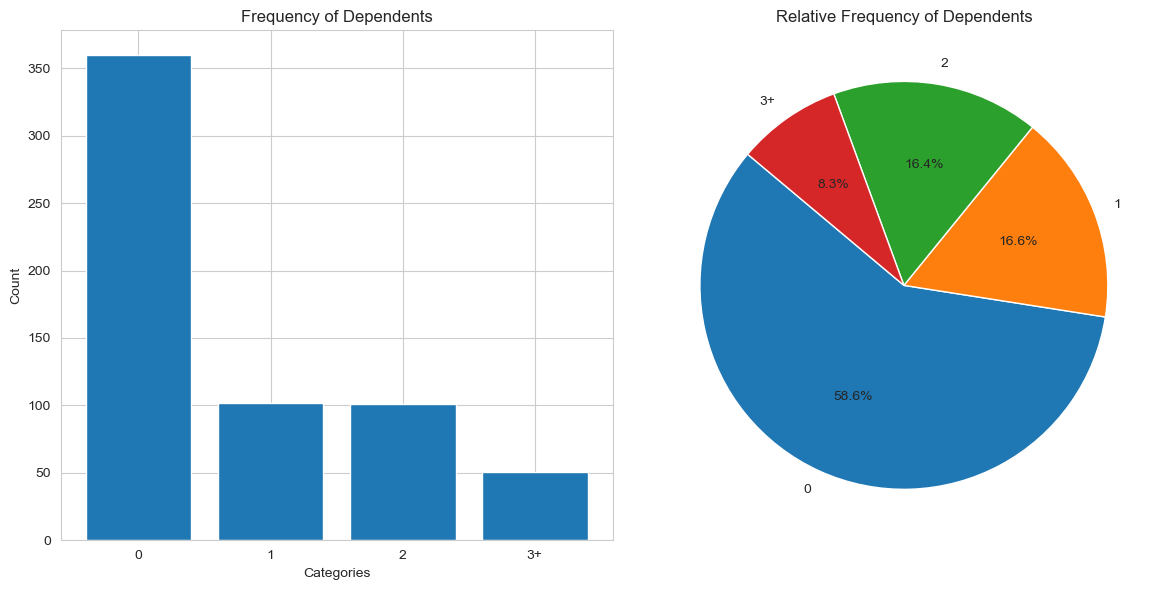

Education frequency table
+---+--------------+-----------+
|   |    Class     | Frequency |
+---+--------------+-----------+
| 0 |   Graduate   |    480    |
| 1 | Not Graduate |    134    |
+---+--------------+-----------+
Education Relative frequency table
+---+--------------+-----------+----------------------+
|   |    Class     | Frequency | Relative Frequency % |
+---+--------------+-----------+----------------------+
| 0 |   Graduate   |    480    |        78.18         |
| 1 | Not Graduate |    134    |        21.82         |
+---+--------------+-----------+----------------------+


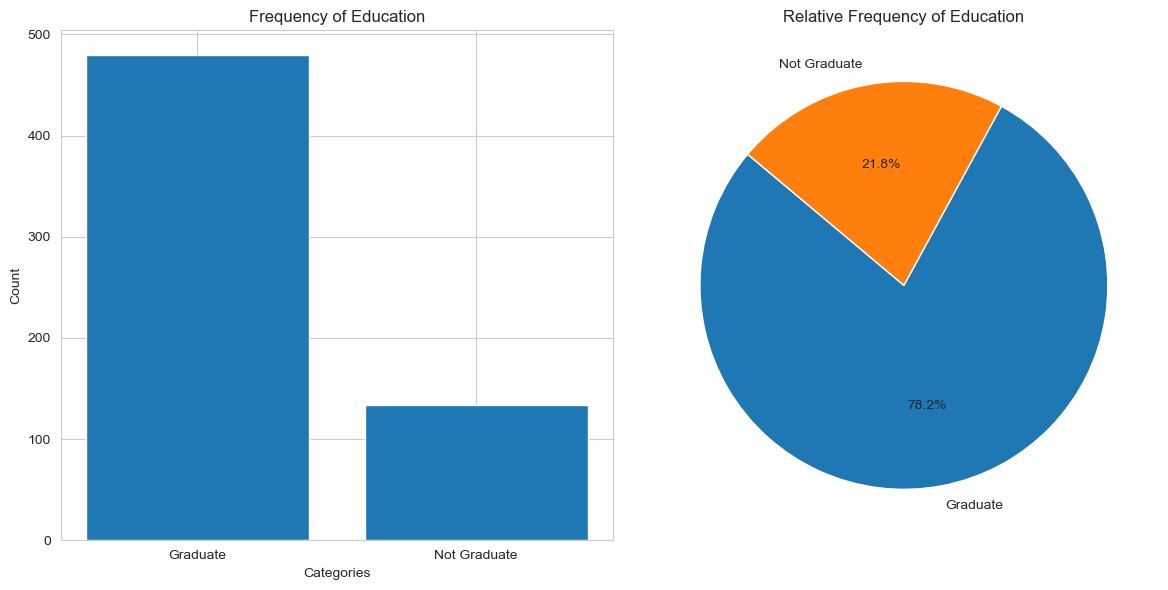

Self_Employed frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |    532    |
| 1 |  Yes  |    82     |
+---+-------+-----------+
Self_Employed Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |    532    |        86.64         |
| 1 |  Yes  |    82     |        13.36         |
+---+-------+-----------+----------------------+


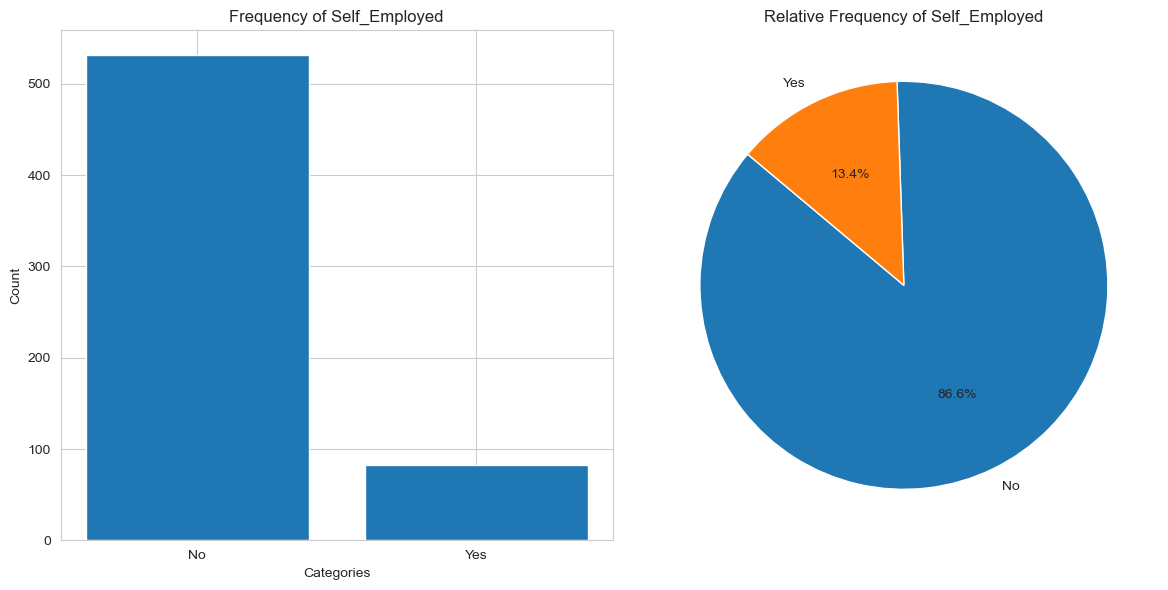

Property_Area frequency table
+---+-----------+-----------+
|   |   Class   | Frequency |
+---+-----------+-----------+
| 0 | Semiurban |    233    |
| 1 |   Urban   |    202    |
| 2 |   Rural   |    179    |
+---+-----------+-----------+
Property_Area Relative frequency table
+---+-----------+-----------+----------------------+
|   |   Class   | Frequency | Relative Frequency % |
+---+-----------+-----------+----------------------+
| 0 | Semiurban |    233    |        37.95         |
| 1 |   Urban   |    202    |         32.9         |
| 2 |   Rural   |    179    |        29.15         |
+---+-----------+-----------+----------------------+


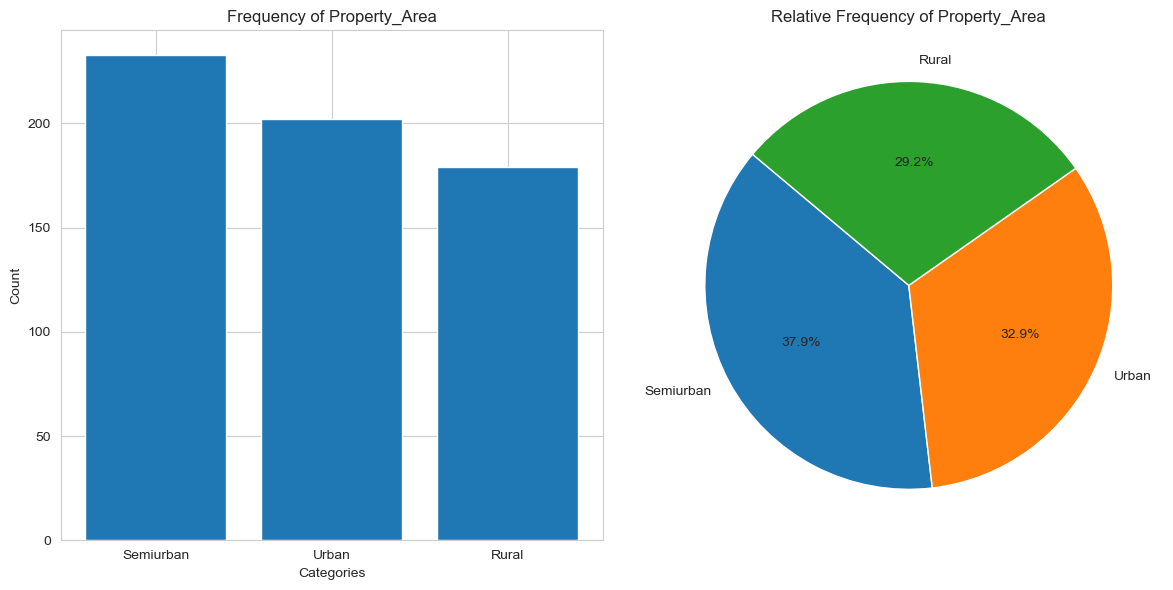

Loan_Status frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   Y   |    422    |
| 1 |   N   |    192    |
+---+-------+-----------+
Loan_Status Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   Y   |    422    |        68.73         |
| 1 |   N   |    192    |        31.27         |
+---+-------+-----------+----------------------+


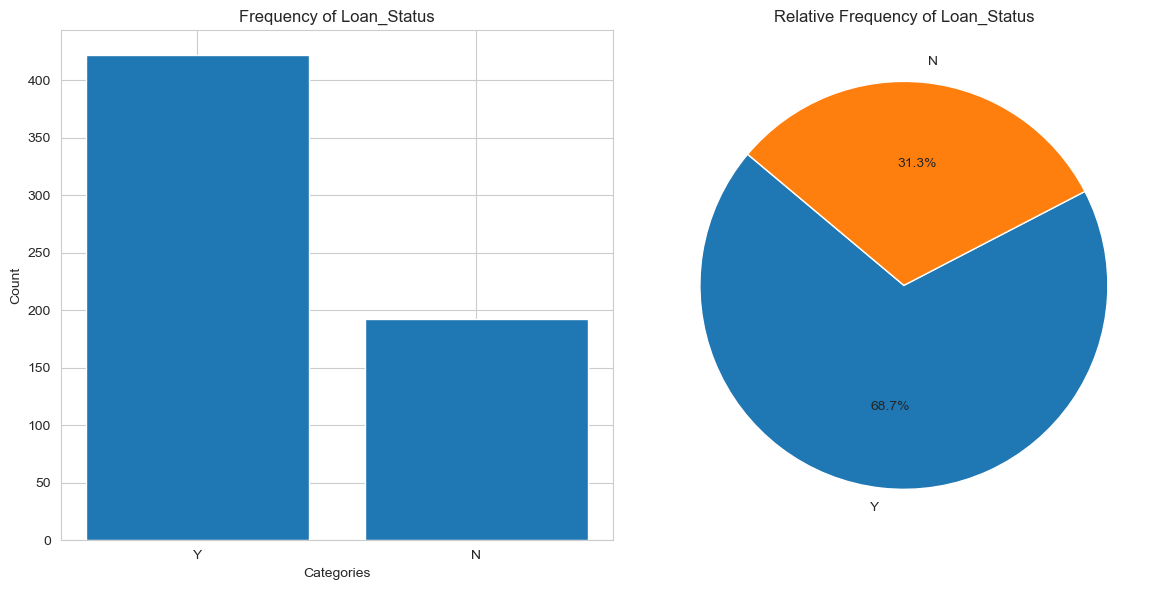

In [144]:
from sklearn.pipeline import Pipeline

pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])

loan_cat_df = loan_df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(loan_cat_df)

$Observations$
 - Loan Status -68% Yes - 31% No
 - Self Employeed - 13%  Yes -  86% No
 - Graduades - 78% Yes -   21% No
 - Married - 65% Yes - 34% No
 - Gender - Male 81% - Female 18%

# 5 . Handling Missing Values in Numerical Columns

In [145]:
loan_df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [146]:
#very sensitive infroamtion - so i am droping the rows of having credit history as nan
loan_df.dropna(subset=["Credit_History"],inplace=True)

In [147]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,564.000000,564.000000,543.000000,550.000000,564.000000
mean,5466.436170,1530.448440,145.088398,342.152727,0.842199
std,6271.344106,2471.721359,83.309428,64.586272,0.364878
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2892.750000,0.000000,100.000000,360.000000,1.000000
50%,3815.000000,1105.500000,127.000000,360.000000,1.000000
75%,5803.750000,2250.000000,165.500000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [148]:
for var in ["LoanAmount", "Loan_Amount_Term"]:
    median = loan_df[var].median()
    #print(median)

    # fill the missing value with mode
    loan_df[var].fillna(median,inplace=True)
    
# check for missing values - for confirmation
loan_df.isnull().sum()
    

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 6. Numerical - Variables - Analysis - Using -Pipeline

In [149]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
            var_min = int(df[con_var].min())
            var_max = int(df[con_var].max())
            
            step = int(round((var_max-var_min)/10))
            bins = [x for x in range(var_min,var_max+1,step)]
            print(f"{con_var} bins {bins}")
            freq_table = pd.cut(df[con_var], bins=bins).value_counts().sort_index()

            table_frame = pd.DataFrame({
            'Interval': freq_table.index,
            'Frequency': freq_table.values,
            })
            print(f"Frequency Distribution Table for {con_var}:")


            # Print the result as a table
            print(tabulate(table_frame, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = table_frame['Frequency'].sum()
            table_frame['Relative Frequency %'] = round((table_frame['Frequency'] / total_count)*100,2)
            # Print the result as a table
            print(f"Relative Frequency Distribution Table for {con_var}:")
            print(tabulate(table_frame, headers='keys', tablefmt='pretty'))
            
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], bins=bins, color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, bins=bins, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()


            sns.set_style("whitegrid")
            plt.figure(figsize=(10, 6))
            plt.title(f'Box-Plot - {con_var}')
            sns.boxplot(x=con_var, data=df)
            plt.show()


            sns.set_style("whitegrid")
            plt.figure(figsize=(10, 6))
            plt.title(f'Violin Plot - {con_var}')
            sns.violinplot(x=con_var, data=df)
            plt.show()
        
        

ApplicantIncome bins [150, 8235, 16320, 24405, 32490, 40575, 48660, 56745, 64830, 72915, 81000]
Frequency Distribution Table for ApplicantIncome:
+---+----------------+-----------+
|   |    Interval    | Frequency |
+---+----------------+-----------+
| 0 |  (150, 8235]   |    485    |
| 1 | (8235, 16320]  |    58     |
| 2 | (16320, 24405] |    13     |
| 3 | (24405, 32490] |     0     |
| 4 | (32490, 40575] |     4     |
| 5 | (40575, 48660] |     0     |
| 6 | (48660, 56745] |     1     |
| 7 | (56745, 64830] |     1     |
| 8 | (64830, 72915] |     0     |
| 9 | (72915, 81000] |     1     |
+---+----------------+-----------+
Relative Frequency Distribution Table for ApplicantIncome:
+---+----------------+-----------+----------------------+
|   |    Interval    | Frequency | Relative Frequency % |
+---+----------------+-----------+----------------------+
| 0 |  (150, 8235]   |    485    |        86.15         |
| 1 | (8235, 16320]  |    58     |         10.3         |
| 2 | (16320, 2

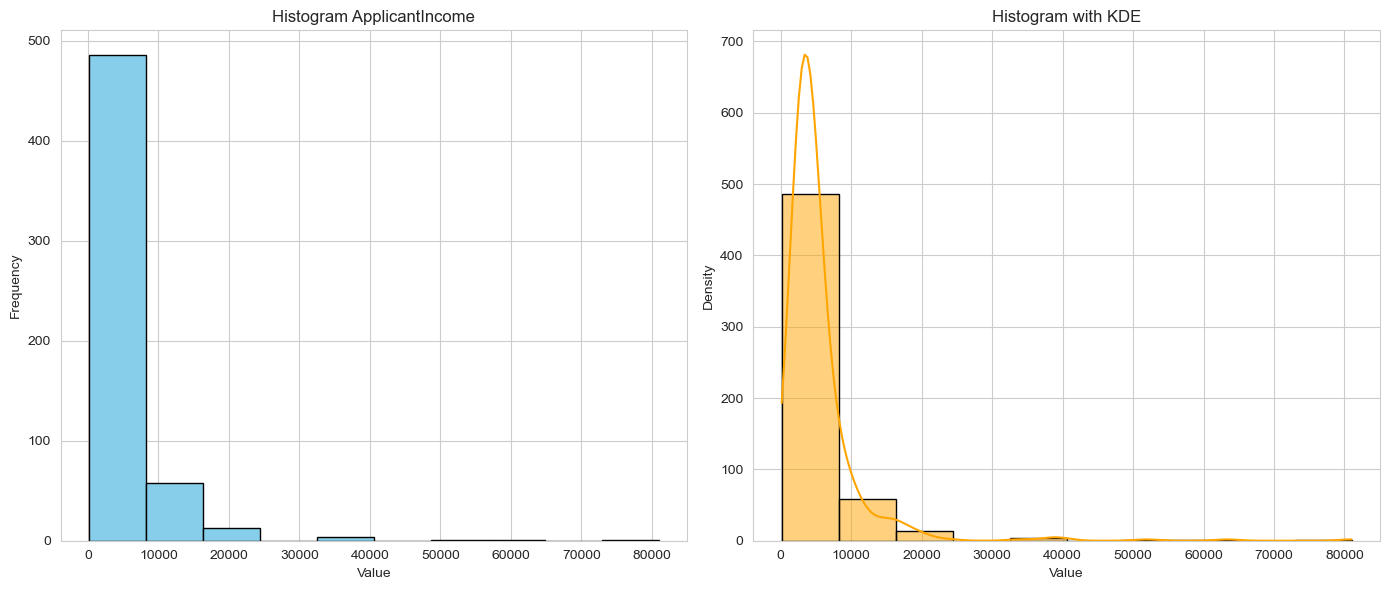

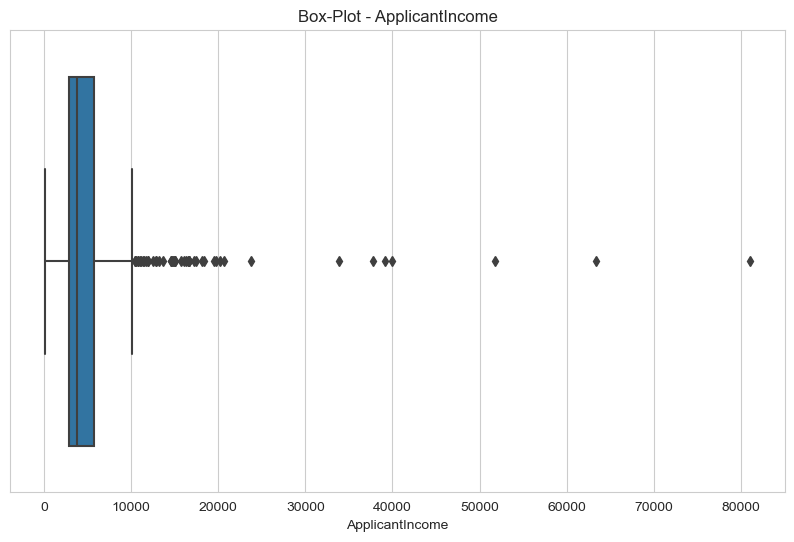

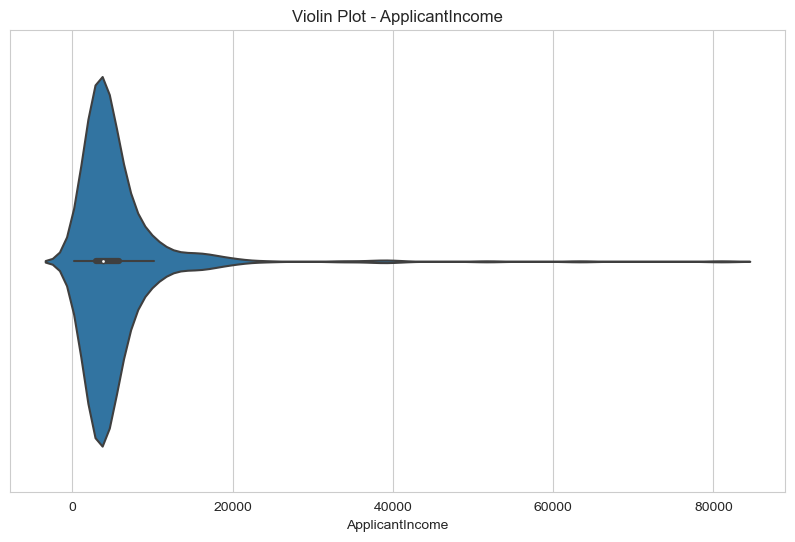

CoapplicantIncome bins [0, 3384, 6768, 10152, 13536, 16920, 20304, 23688, 27072, 30456]
Frequency Distribution Table for CoapplicantIncome:
+---+----------------+-----------+
|   |    Interval    | Frequency |
+---+----------------+-----------+
| 0 |   (0, 3384]    |    242    |
| 1 |  (3384, 6768]  |    55     |
| 2 | (6768, 10152]  |     8     |
| 3 | (10152, 13536] |     2     |
| 4 | (13536, 16920] |     0     |
| 5 | (16920, 20304] |     2     |
| 6 | (20304, 23688] |     0     |
| 7 | (23688, 27072] |     0     |
| 8 | (27072, 30456] |     0     |
+---+----------------+-----------+
Relative Frequency Distribution Table for CoapplicantIncome:
+---+----------------+-----------+----------------------+
|   |    Interval    | Frequency | Relative Frequency % |
+---+----------------+-----------+----------------------+
| 0 |   (0, 3384]    |    242    |        78.32         |
| 1 |  (3384, 6768]  |    55     |         17.8         |
| 2 | (6768, 10152]  |     8     |         2.59       

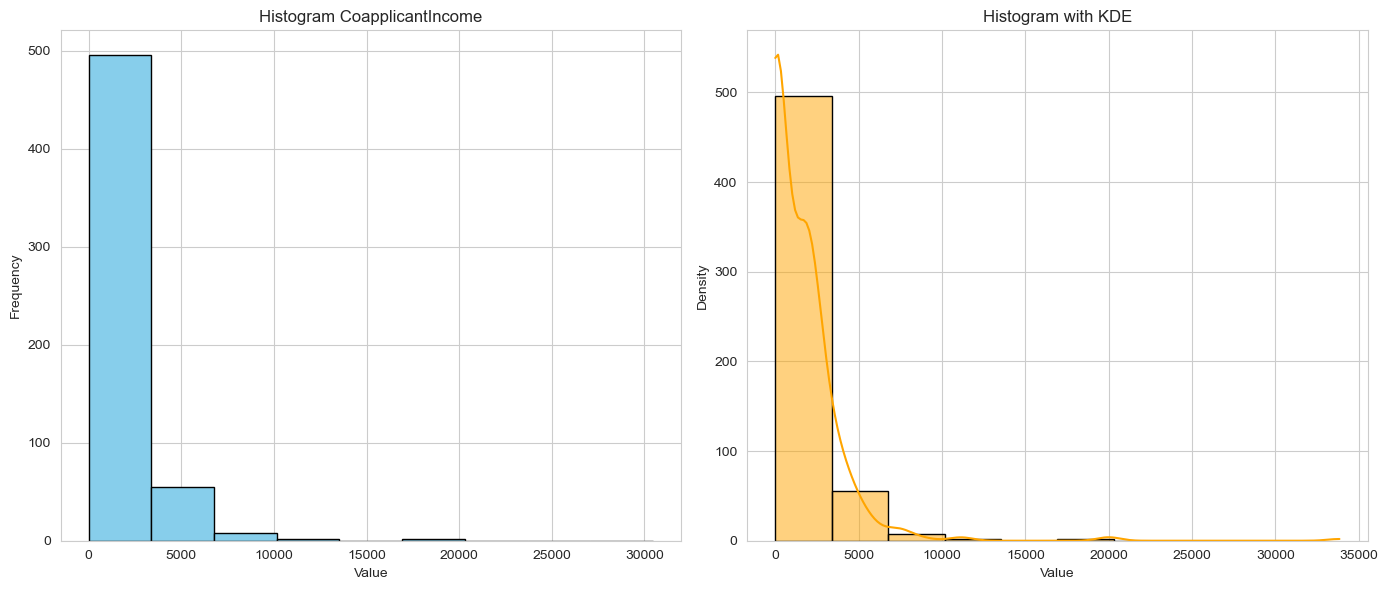

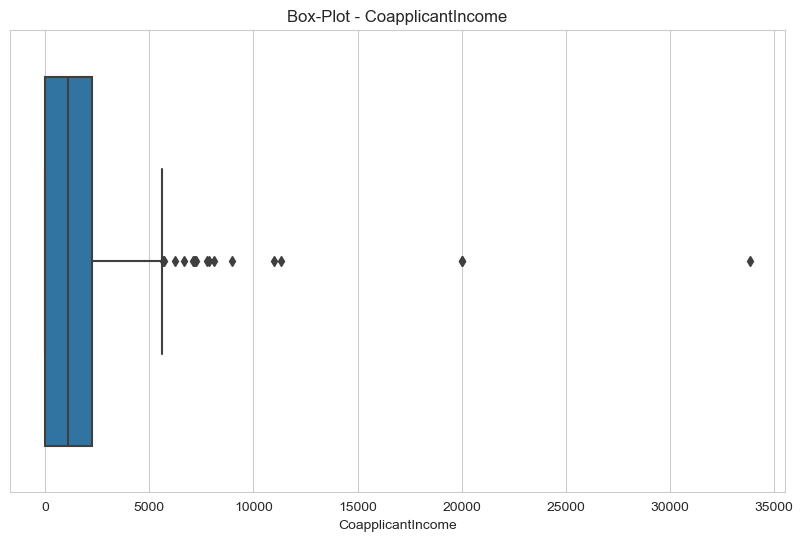

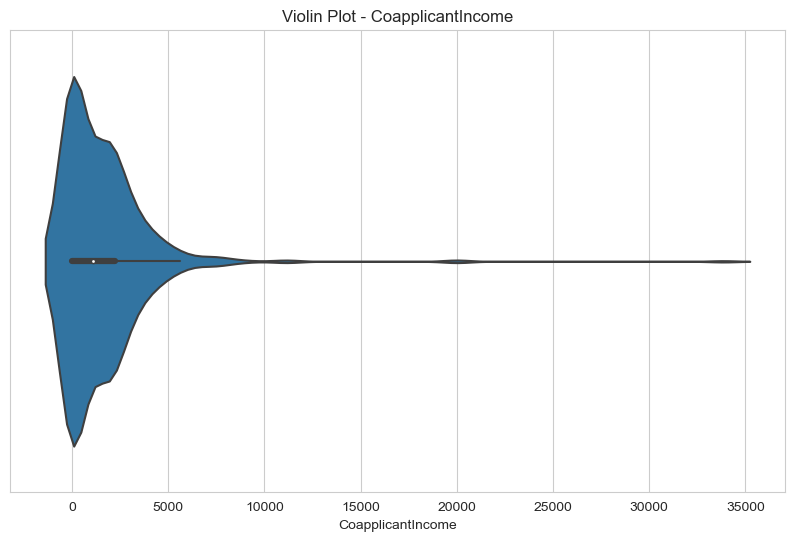

LoanAmount bins [9, 78, 147, 216, 285, 354, 423, 492, 561, 630, 699]
Frequency Distribution Table for LoanAmount:
+---+------------+-----------+
|   |  Interval  | Frequency |
+---+------------+-----------+
| 0 |  (9, 78]   |    66     |
| 1 | (78, 147]  |    306    |
| 2 | (147, 216] |    131    |
| 3 | (216, 285] |    30     |
| 4 | (285, 354] |    13     |
| 5 | (354, 423] |     6     |
| 6 | (423, 492] |     4     |
| 7 | (492, 561] |     3     |
| 8 | (561, 630] |     3     |
| 9 | (630, 699] |     0     |
+---+------------+-----------+
Relative Frequency Distribution Table for LoanAmount:
+---+------------+-----------+----------------------+
|   |  Interval  | Frequency | Relative Frequency % |
+---+------------+-----------+----------------------+
| 0 |  (9, 78]   |    66     |        11.74         |
| 1 | (78, 147]  |    306    |        54.45         |
| 2 | (147, 216] |    131    |        23.31         |
| 3 | (216, 285] |    30     |         5.34         |
| 4 | (285, 354] |  

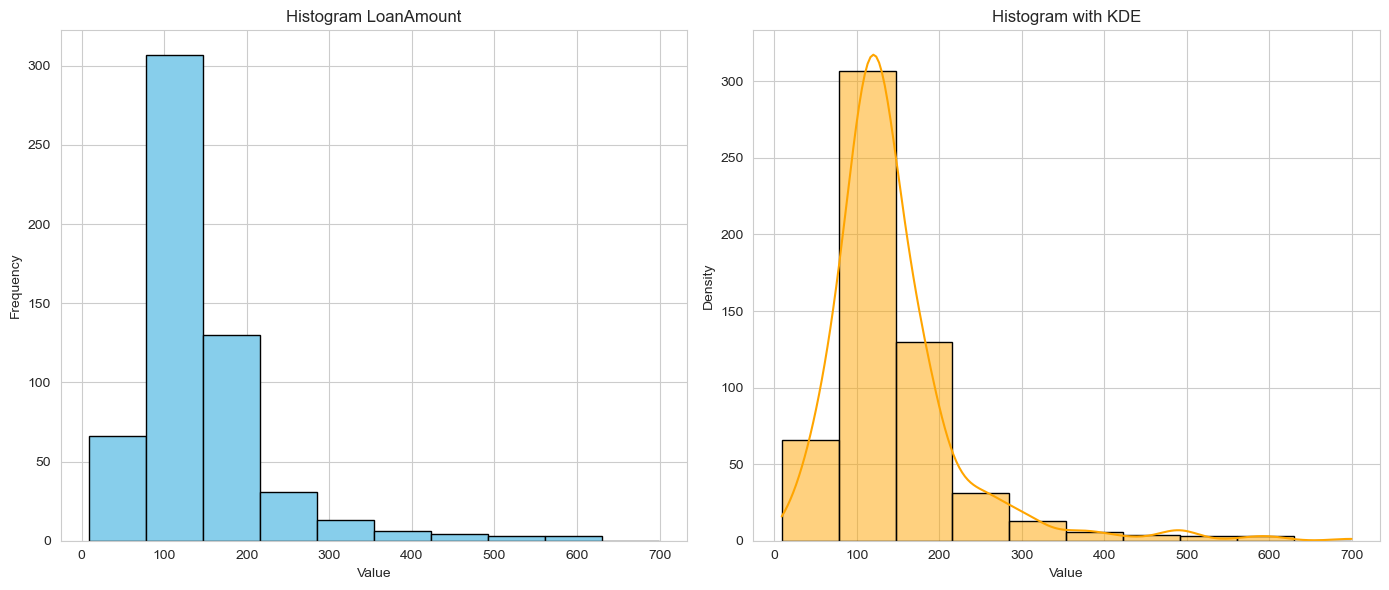

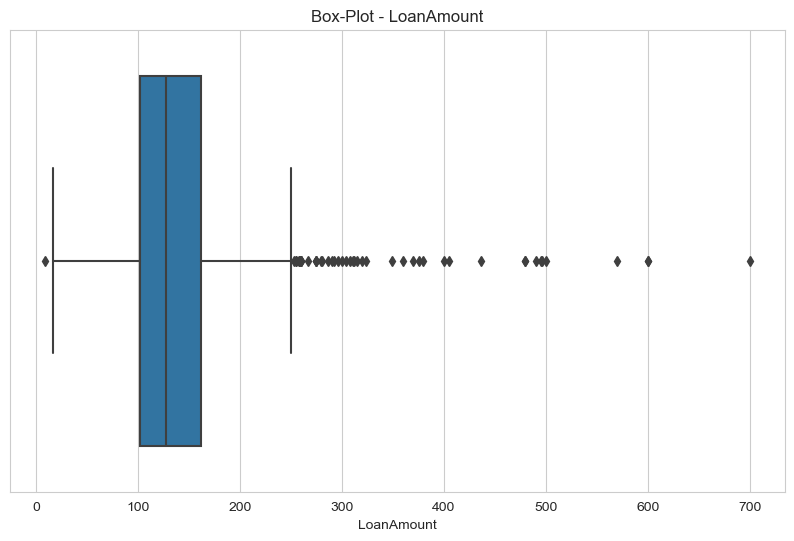

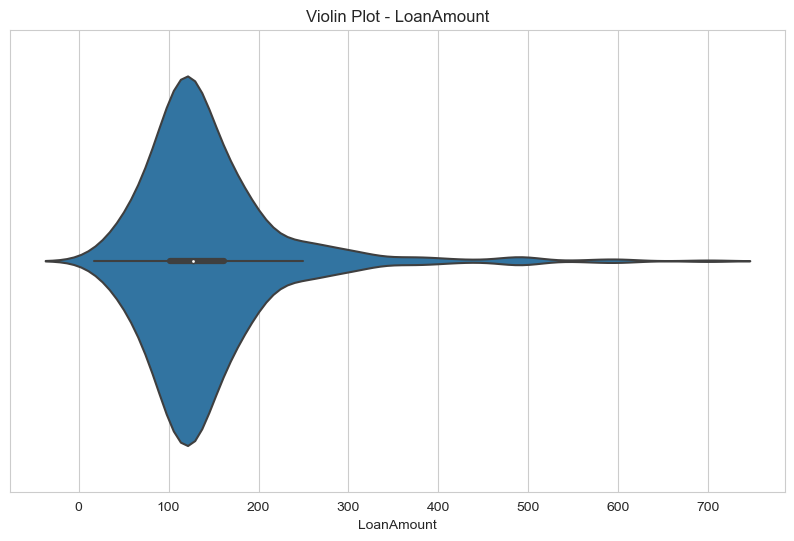

Loan_Amount_Term bins [36, 80, 124, 168, 212, 256, 300, 344, 388, 432, 476]
Frequency Distribution Table for Loan_Amount_Term:
+---+------------+-----------+
|   |  Interval  | Frequency |
+---+------------+-----------+
| 0 |  (36, 80]  |     2     |
| 1 | (80, 124]  |     6     |
| 2 | (124, 168] |     0     |
| 3 | (168, 212] |    43     |
| 4 | (212, 256] |     3     |
| 5 | (256, 300] |    10     |
| 6 | (300, 344] |     0     |
| 7 | (344, 388] |    484    |
| 8 | (388, 432] |     0     |
| 9 | (432, 476] |     0     |
+---+------------+-----------+
Relative Frequency Distribution Table for Loan_Amount_Term:
+---+------------+-----------+----------------------+
|   |  Interval  | Frequency | Relative Frequency % |
+---+------------+-----------+----------------------+
| 0 |  (36, 80]  |     2     |         0.36         |
| 1 | (80, 124]  |     6     |         1.09         |
| 2 | (124, 168] |     0     |         0.0          |
| 3 | (168, 212] |    43     |         7.85         |
|

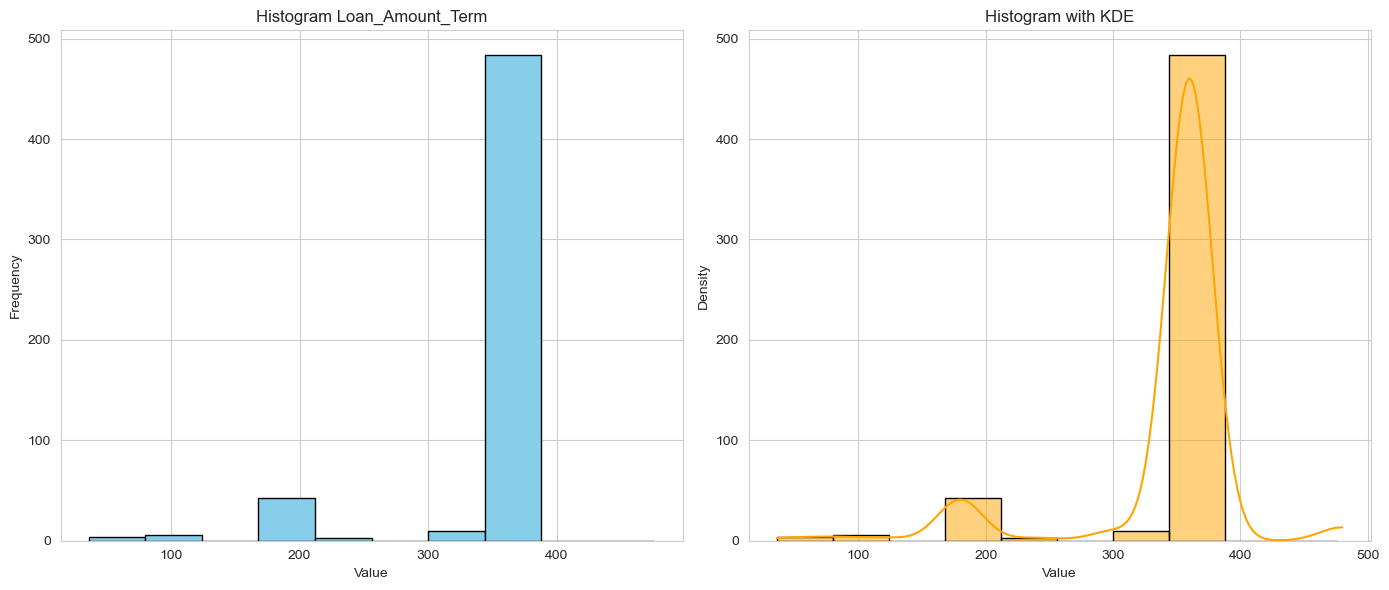

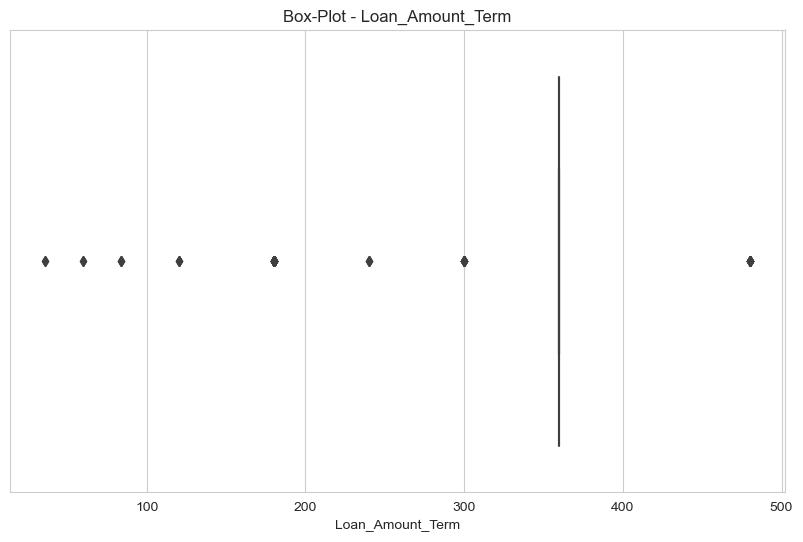

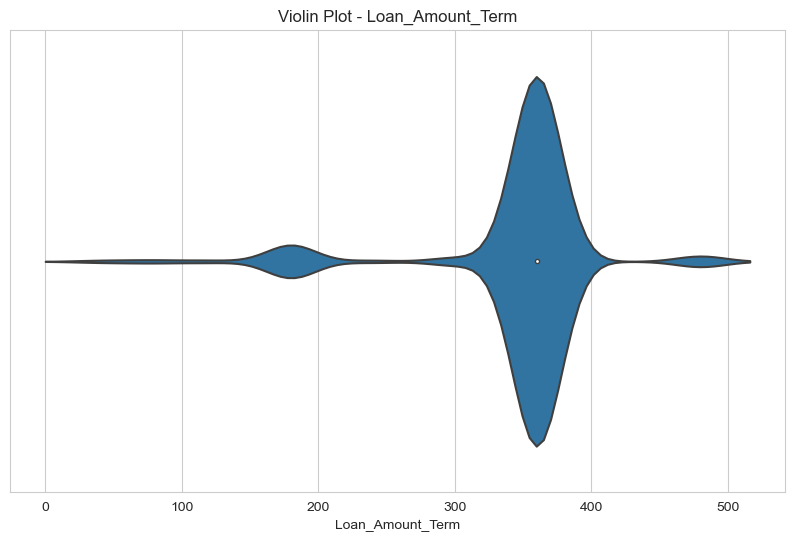

In [150]:
from sklearn.pipeline import Pipeline

pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])

loan_num_df = loan_df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(loan_num_df)

<Axes: >

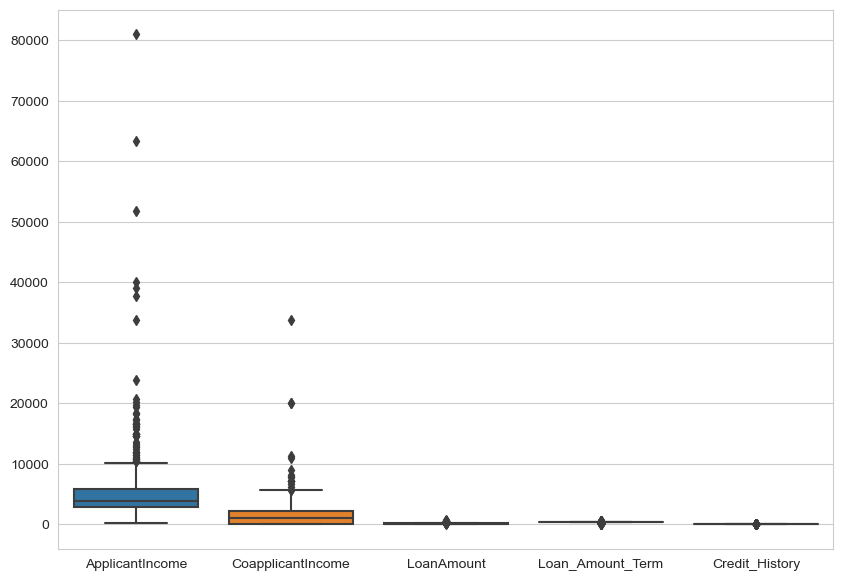

In [151]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=loan_df)

In [152]:
len(loan_df["CoapplicantIncome"] == 0)

564

$Observations$
- ApplicantIncome is having outliers - has right skewed data distribution
- CoapplicantIncome is having outliers - has right skewed data distribution
- CoapplicantIncome entries- 564 did not have income(zero income)
- LoanAmount - looks like normal distribution.


# 6. Transformation 

In [154]:
loan_df["ApplicantIncome_sqrt"] = np.sqrt(loan_df["ApplicantIncome"])
loan_df["CoapplicantIncome_sqrt"] = np.sqrt(loan_df["CoapplicantIncome"])

In [156]:
loan_df.drop(columns=["ApplicantIncome","CoapplicantIncome"],axis=1, inplace=True)

<Axes: >

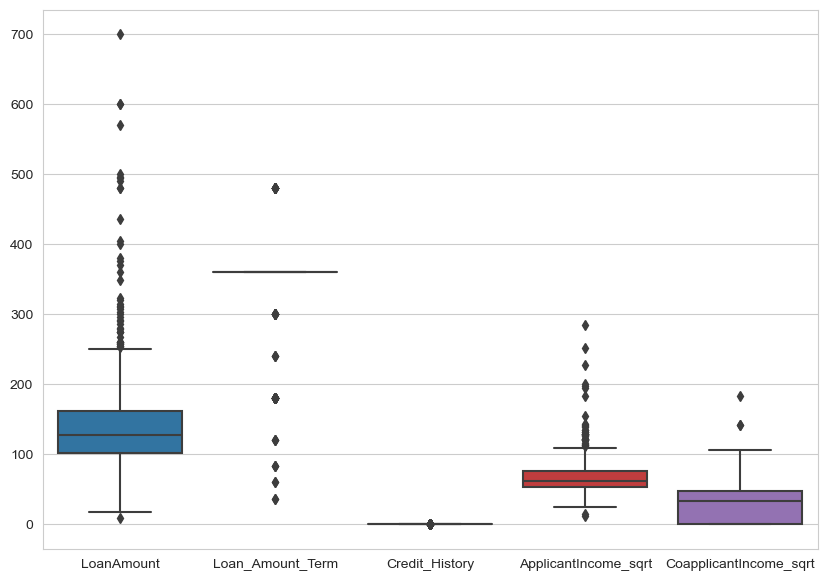

In [157]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=loan_df)

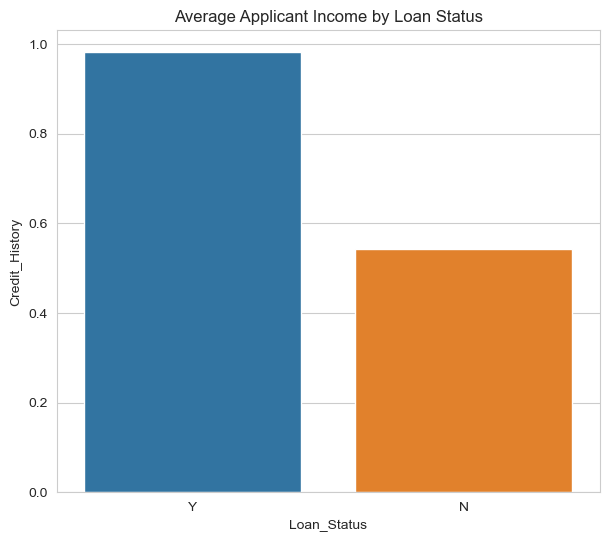

In [161]:
plt.figure(figsize=(7, 6))
sns.barplot(x='Loan_Status', y='Credit_History', data=loan_df, errorbar = None)
plt.title('Average Applicant Income by Loan Status')
plt.show()

In [170]:
loan_df[loan_df["Credit_History"] < 0.2]["Loan_Status"]

7      N
17     N
20     N
22     N
23     N
      ..
576    N
584    N
589    N
597    N
613    N
Name: Loan_Status, Length: 89, dtype: object

<Axes: ylabel='Frequency'>

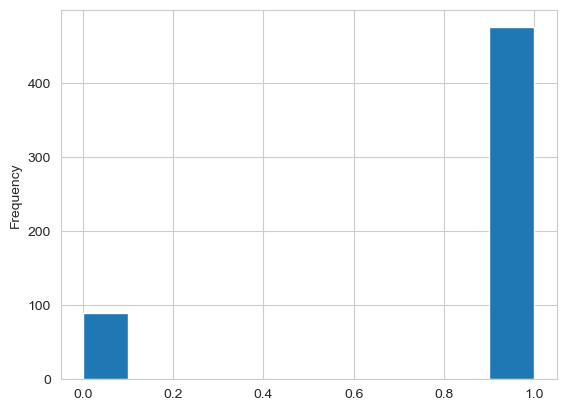

In [167]:
loan_df["Credit_History"].plot(kind='hist')

In [75]:
loan_df["Credit_History"].describe()

count    614.000000
mean       0.855049
std        0.352339
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

<Axes: ylabel='Frequency'>

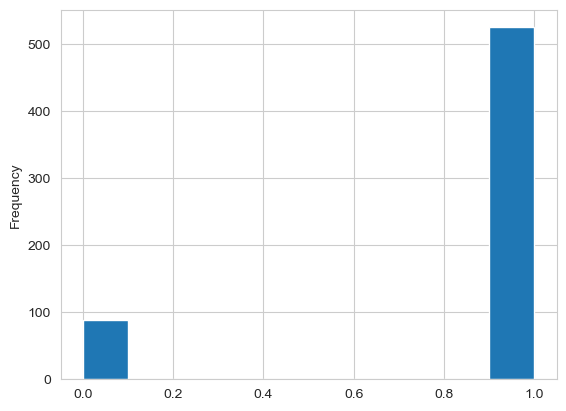

In [76]:
loan_df["Credit_History"].plot(kind='hist')

In [77]:
loan_df["Credit_History"].value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

# 7. Bi Variate Analysis

In [84]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

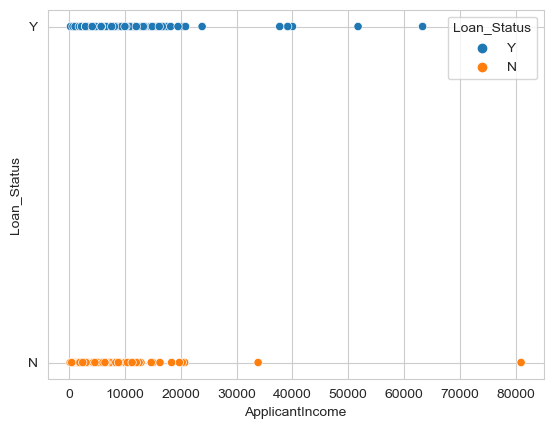

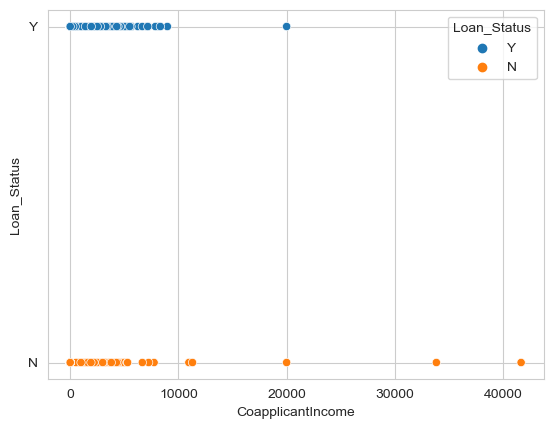

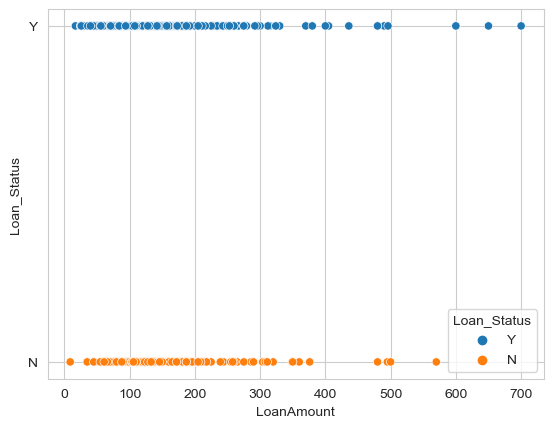

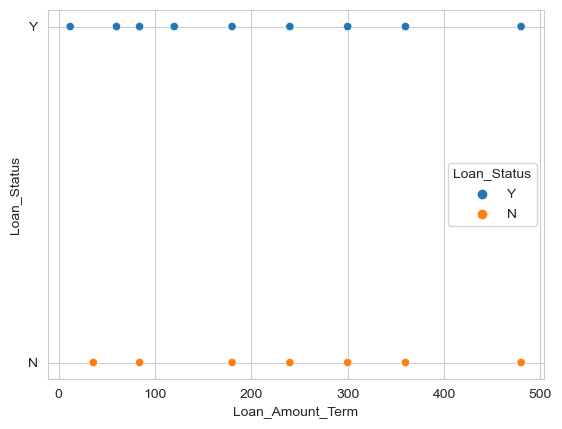

In [85]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']:
    sns.scatterplot(data=loan_df, x=i, y="Loan_Status" ,hue="Loan_Status")
    plt.show()

In [86]:
loan_df["Income"]=loan_df["ApplicantIncome"] + loan_df["CoapplicantIncome"]

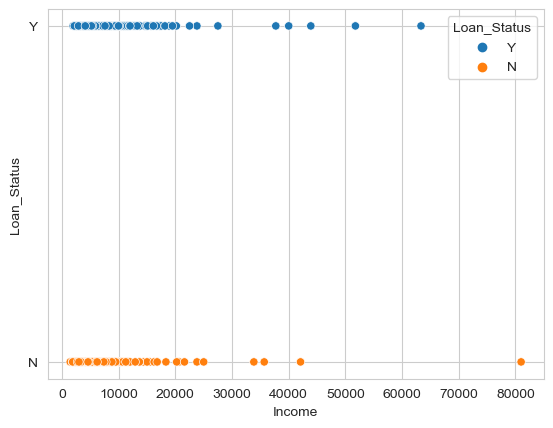

In [87]:
sns.scatterplot(data=loan_df, x="Income", y="Loan_Status" ,hue="Loan_Status")
plt.show()

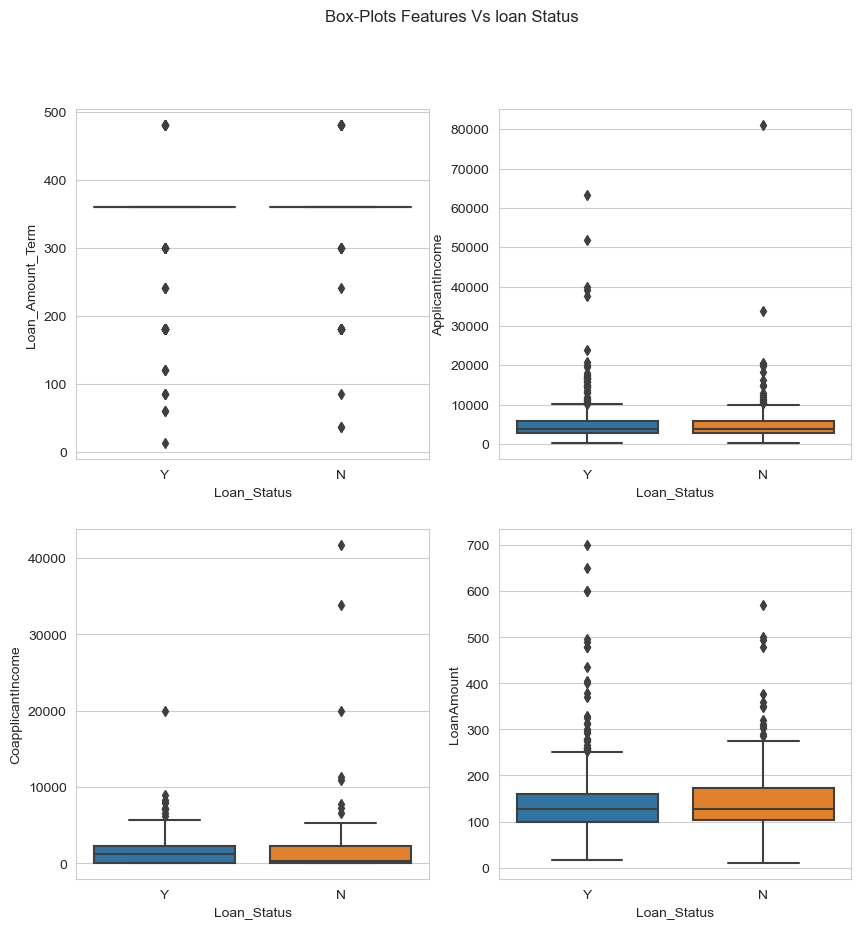

In [89]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Box-Plots Features Vs loan Status')
sns.boxplot(ax=axes[0, 0], x='Loan_Status',y='Loan_Amount_Term', data=loan_df)
sns.boxplot(ax=axes[0, 1], x='Loan_Status',y='ApplicantIncome', data=loan_df)
sns.boxplot(ax=axes[1, 0], x='Loan_Status',y='CoapplicantIncome', data=loan_df)
sns.boxplot(ax=axes[1, 1], x='Loan_Status',y='LoanAmount', data=loan_df)
plt.show()

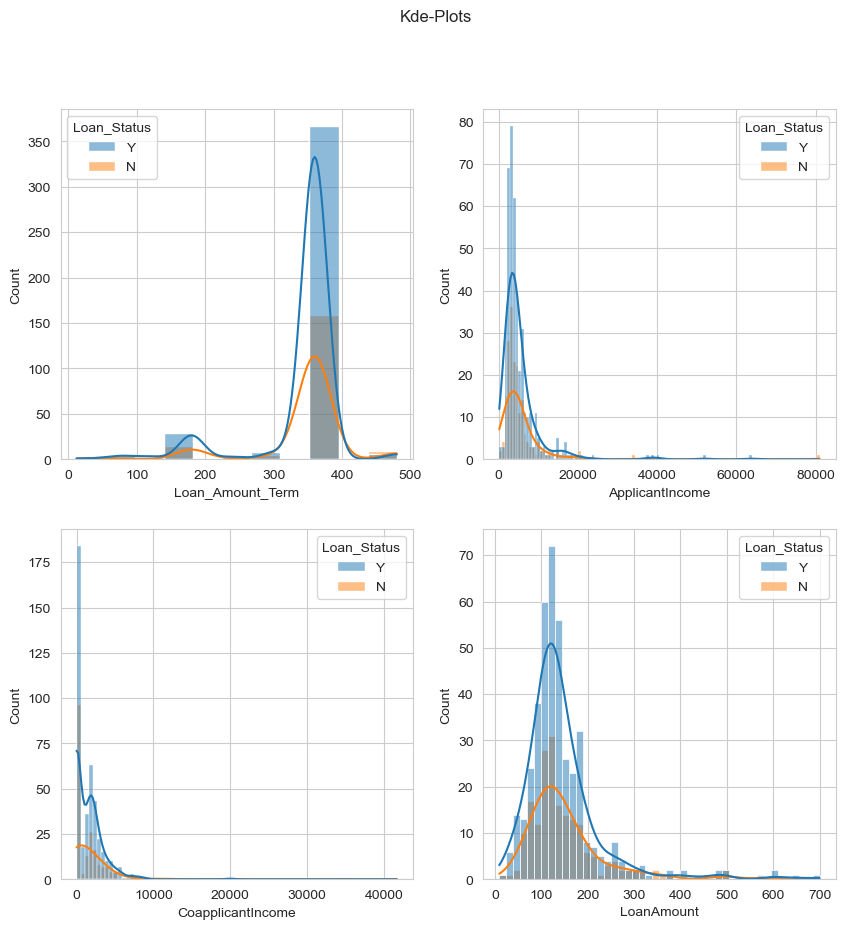

In [90]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Kde-Plots')
sns.histplot(ax=axes[0, 0], hue='Loan_Status',x='Loan_Amount_Term', data=loan_df,kde=True)
sns.histplot(ax=axes[0, 1], hue='Loan_Status',x='ApplicantIncome', data=loan_df,kde=True)
sns.histplot(ax=axes[1, 0], hue='Loan_Status',x='CoapplicantIncome', data=loan_df,kde=True)
sns.histplot(ax=axes[1, 1], hue='Loan_Status',x='LoanAmount', data=loan_df,kde=True)
plt.show()

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.565181   
CoapplicantIncome        -0.116605           1.000000    0.189218   
LoanAmount                0.565181           0.189218    1.000000   
Loan_Amount_Term         -0.046531          -0.059383    0.036960   
Credit_History           -0.018615           0.011134   -0.000607   
Income                    0.893037           0.342781    0.620316   

                   Loan_Amount_Term  Credit_History    Income  
ApplicantIncome           -0.046531       -0.018615  0.893037  
CoapplicantIncome         -0.059383        0.011134  0.342781  
LoanAmount                 0.036960       -0.000607  0.620316  
Loan_Amount_Term           1.000000       -0.004705 -0.070917  
Credit_History            -0.004705        1.000000 -0.012563  
Income                    -0.070917       -0.012563  1.000000  


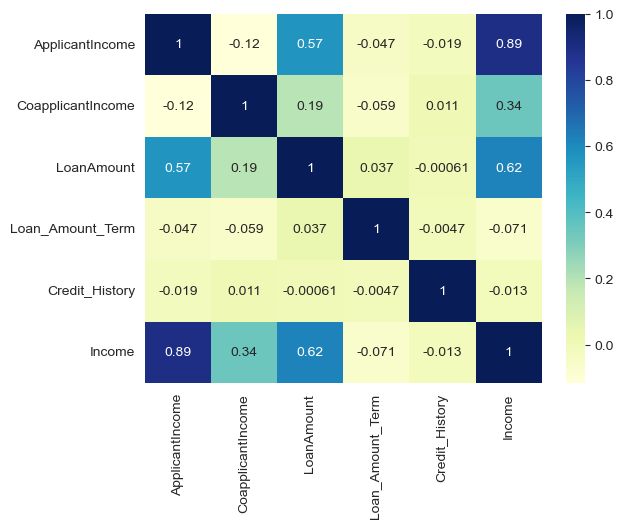

In [91]:
print(loan_df.corr(numeric_only=True))
sns.heatmap(loan_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

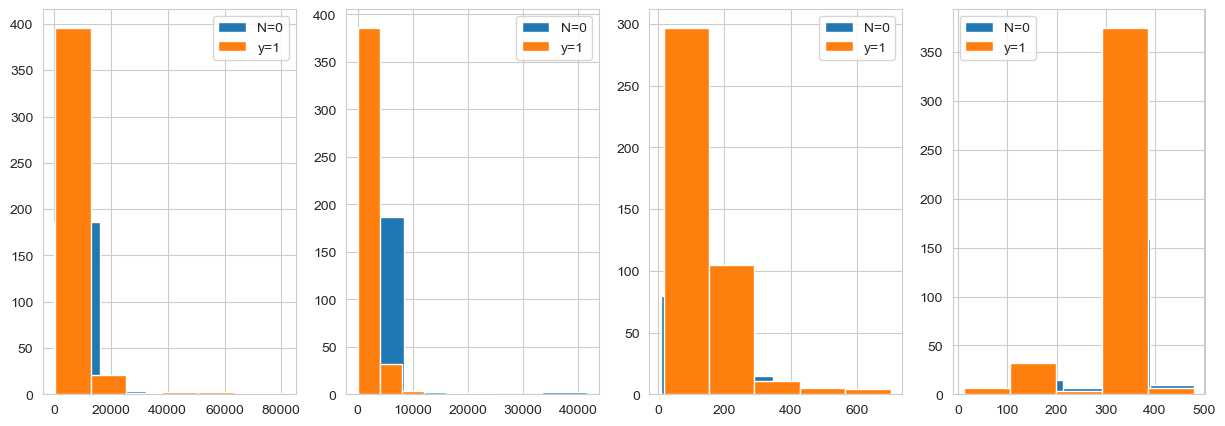

In [96]:
con_vara = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

fig,ax = plt.subplots(1,4,figsize=(15,5))
for i,x in enumerate(con_vara):
    ax[i].hist(loan_df[x][loan_df.Loan_Status=="N"],label="N=0",bins=5)
    ax[i].hist(loan_df[x][loan_df.Loan_Status=="Y"],label="y=1",bins=5)
    ax[i].legend()

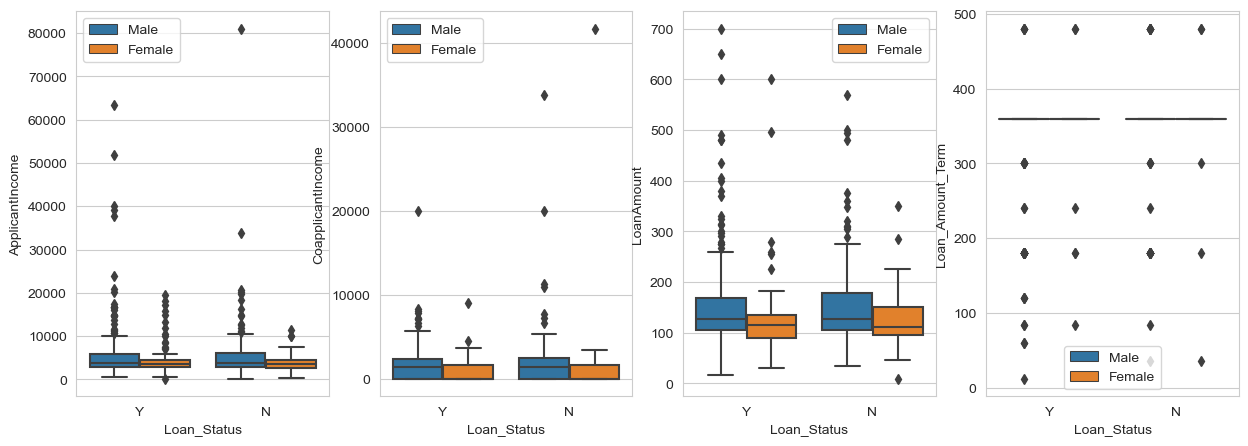

In [98]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
for i,x in enumerate(con_vara):
    sns.boxplot(x=loan_df.Loan_Status, y=loan_df[x] ,ax=ax[i],hue=loan_df.Gender)
    ax[i].legend()

In [ ]:
['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area',

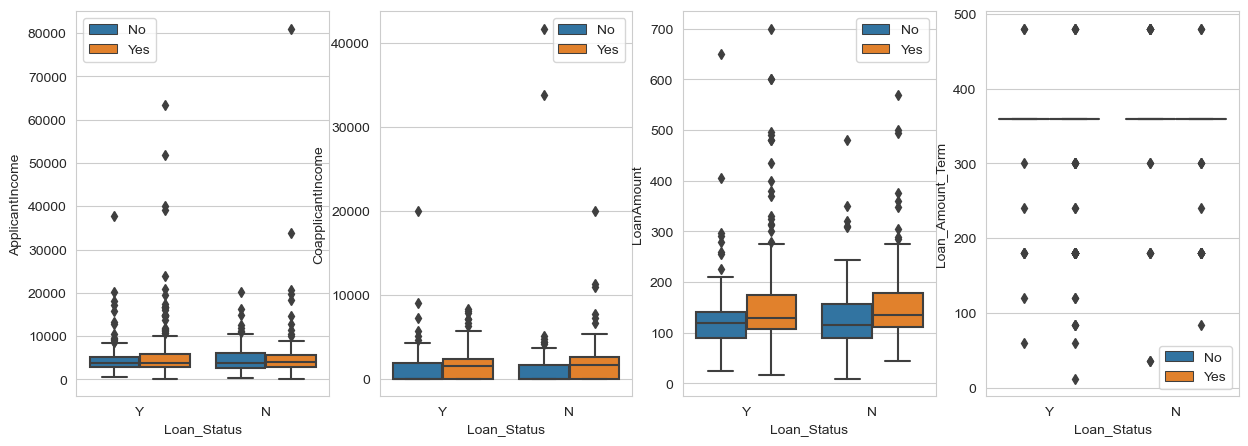

In [99]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
for i,x in enumerate(con_vara):
    sns.boxplot(x=loan_df.Loan_Status, y=loan_df[x] ,ax=ax[i],hue=loan_df.Married)
    ax[i].legend()

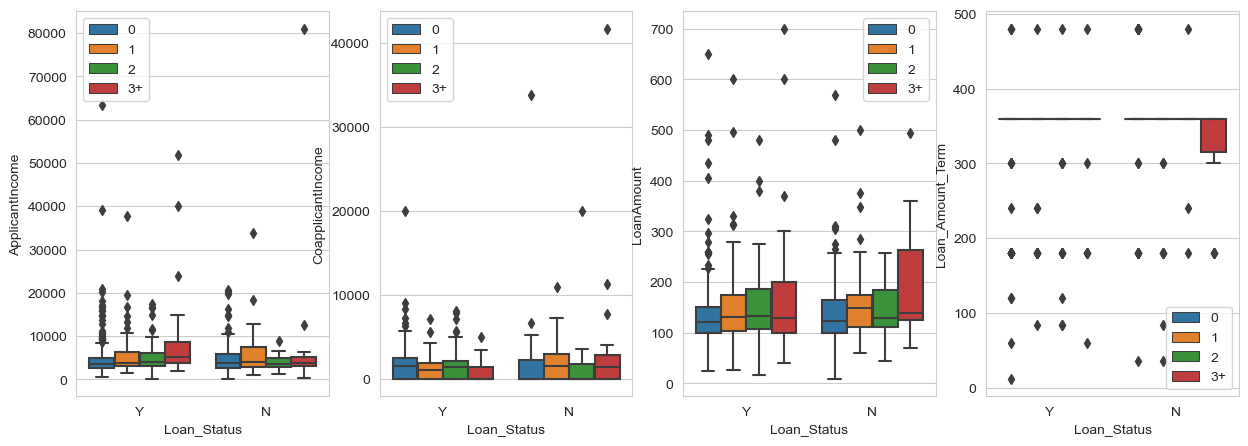

In [100]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
for i,x in enumerate(con_vara):
    sns.boxplot(x=loan_df.Loan_Status, y=loan_df[x] ,ax=ax[i],hue=loan_df.Dependents)
    ax[i].legend()

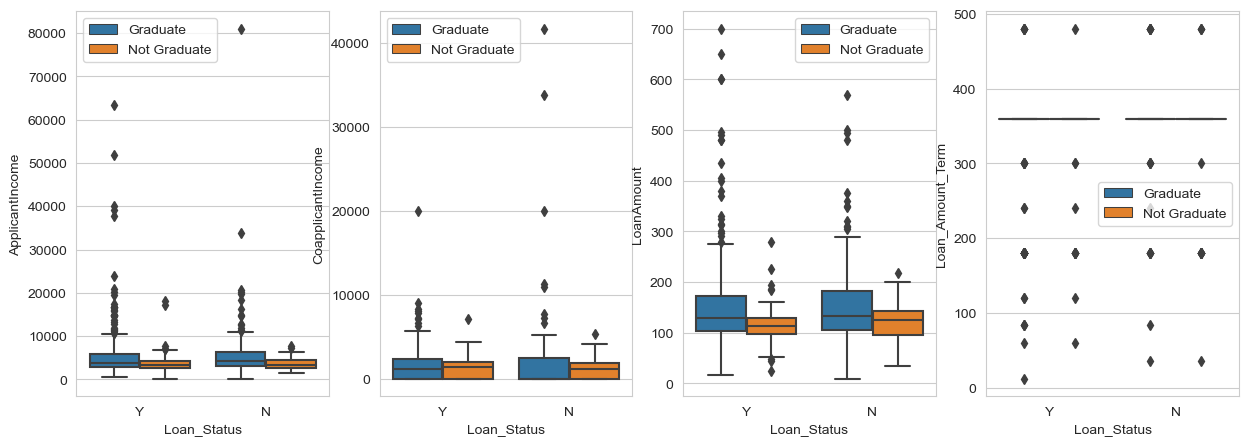

In [101]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
for i,x in enumerate(con_vara):
    sns.boxplot(x=loan_df.Loan_Status, y=loan_df[x] ,ax=ax[i],hue=loan_df.Education)
    ax[i].legend()

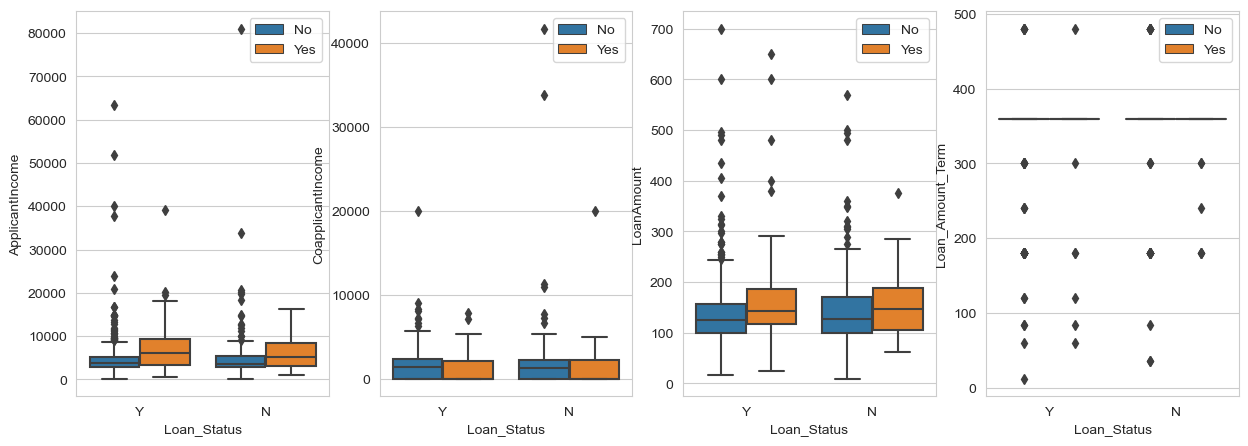

In [102]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
for i,x in enumerate(con_vara):
    sns.boxplot(x=loan_df.Loan_Status, y=loan_df[x] ,ax=ax[i],hue=loan_df.Self_Employed)
    ax[i].legend()

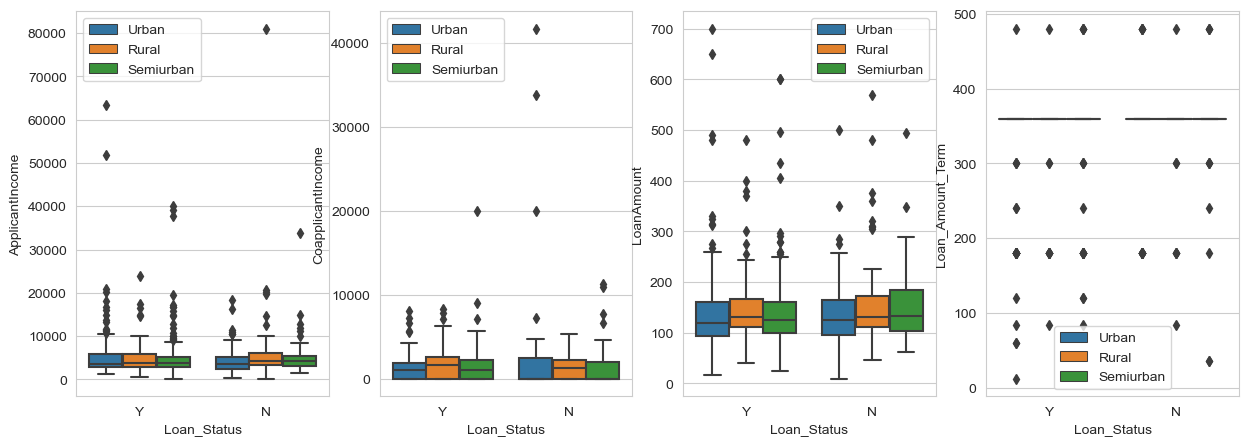

In [103]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
for i,x in enumerate(con_vara):
    sns.boxplot(x=loan_df.Loan_Status, y=loan_df[x] ,ax=ax[i],hue=loan_df.Property_Area)
    ax[i].legend()

In [106]:
cat_vara = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']

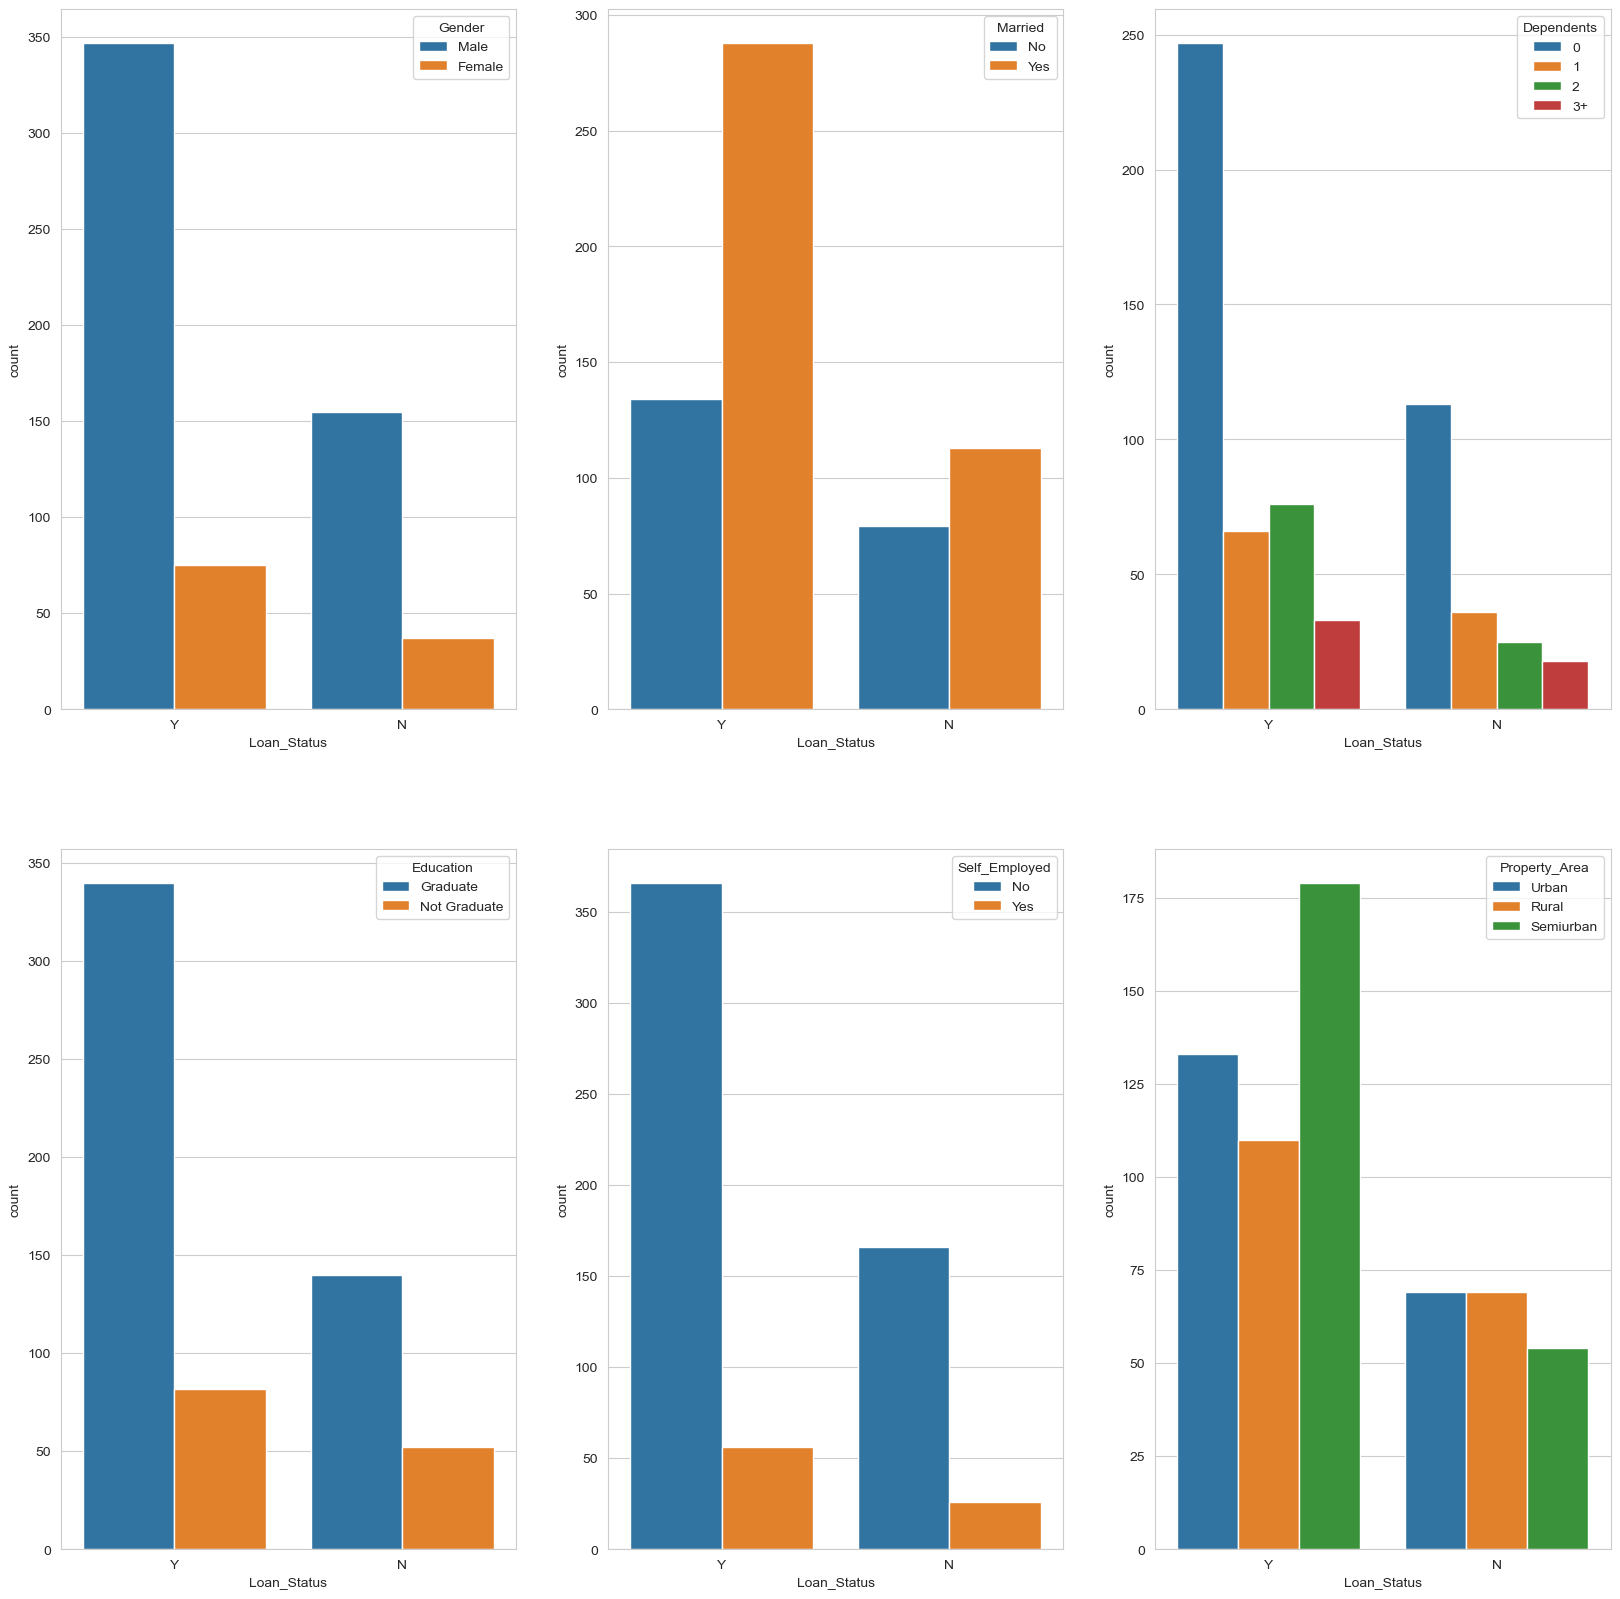

In [107]:
fig,ax = plt.subplots(2,3,figsize=(20,20))
for axi,x in zip(ax.flat,cat_vara):
    sns.countplot(x=loan_df.Loan_Status,hue=loan_df[x],ax=axi)

In [ ]:
Credit_History

In [ ]:
Credit_History
fig,ax = plt.subplots(2,3,figsize=(20,20))
for axi,x in zip(ax.flat,cat_vara):
    sns.countplot(x=loan_df.Loan_Status,hue=loan_df[x],ax=axi)

<Axes: xlabel='Loan_Status', ylabel='count'>

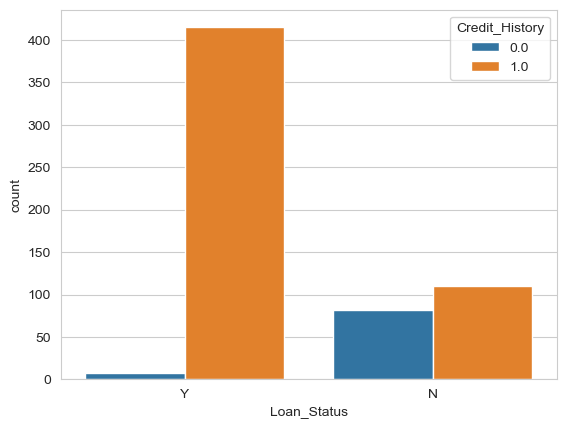

In [110]:
sns.countplot(x=loan_df.Loan_Status,hue=loan_df["Credit_History"])